# General Setup (Mapping)

In [ ]:
# Import the geopandas and geoplot libraries
!pip install geopandas
!pip install geoplot

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import geoplot as gplt
import seaborn as sns

# Set up the color scheme:
import mapclassify as mc

In [ ]:
# Load the json file with coordinates
geo_data = gpd.read_file("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/C1_Toronto_Neighborhoods/neighbourhoods.geojson")

# Basic plot with just outlines
gplt.polyplot(
    geo_data,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(16, 12)
)


In [ ]:
def choropleth_quick_plot(geo_data, data, left_col, right_col, display_col, colour_scheme):
  # Show the distribution
  fullData = geo_data.merge(data, left_on=[left_col], right_on=[right_col])
  #fullData.head(2)

  # Initialize the figure
  scheme = mc.Quantiles(fullData[display_col], k=20)

  # Map
  gplt.choropleth(fullData,
      projection=gcrs.AlbersEqualArea(),
      hue=display_col,
      linewidth=.1,
      figsize=(16, 12),
      scheme=scheme,
      cmap=colour_scheme,
      legend=True,
  );

# Classification

These are libraries that are required for classification.

In [ ]:
#Import Libraries for Single Classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


We will be covering Multiple types of dimensionality reduction techniques: single and multi feature classification.

## Single Variable Classifiers:

 We will be using our demographic information to see if a classfier can correctly classify whether neighbourhoods belong to the "Old City of Toronto".

We will be using logistic regression and X as our classification methods.
For both methods, We will load the data, proccess it, split into train and test datasets, apply the apply the classification algorithm and finally calculate the accuracy of predictions.

In [ ]:

input_data  = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/focussed_neighborhoods_data.csv", encoding='utf-8')
inp_data  = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/C1_Toronto_Neighborhoods/former_toronto.csv", encoding='utf-8')
input_data = input_data.iloc[1: , :]

input_data['pop_den']=input_data['pop_den'].str.replace(',','')
input_data['pop_den']=pd.to_numeric(input_data['pop_den'],errors='coerce').fillna(0, downcast='infer')
#print(data2.index)
#input_data["pop_den"] = input_data["pop_den"]/ input_data["pop_den"][0]
result = pd.concat([input_data, inp_data], axis=1, join='inner')
result["istoronto"]    =0

for counter in  range(1,len(result.index)+1):
  if result["Former_Bourough"][counter] != "Old Toronto":
    result["istoronto"][counter]    =0
  else:
    result["istoronto"][counter]    =1

y = result["istoronto"].values

result1 = result
result1 = result1.drop(['Neighbourhood Id', 'name', 'Neighbourhood', 'Former_Bourough','istoronto'], axis=1)
x =result1
#print(result)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
result.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/fuuy.csv", encoding='utf-8')

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(x_train, y_train)

# Predicting the test results
y_pred = Classifier.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Accuracy score : 0.964
#https://www.analyticssteps.com/blogs/binary-and-multiclass-classification-machine-learning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy Score:  0.9642857142857143


Due to the high accuracy of 96.4%, we can say that this classifier is very accurate.

In [ ]:
#Logistic Regression

#k-Nearest Neighbors

#Decision Trees

#Support Vector Machine

#Naive Bayes



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,neighbourhood,neighbourhood_group,geometry,Unnamed: 0,name,ngbd_id,ac_0_14_perc,ac_15_24_perc,ac_25_54_perc,ac_55_64_perc,...,hcd_sec_dip,hcd_post_sec,hcd_post_sec_apprentice,hcd_post_sec_college,hcd_post_sec_university,hcd_post_sec_university_bachelor_plus,Neighbourhood,Neighbourhood Id,Former_Bourough,istoronto
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",139,York University Heights,27,0.14,0.17,0.44,0.11,...,0.255102,0.595787,0.101433,0.321389,0.067255,0.509923,York University Heights,27,North York,0
1,The Beaches,None,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ...",117,The Beaches,63,0.18,0.09,0.44,0.14,...,0.150278,0.816812,0.033479,0.206211,0.023290,0.737021,The Beaches,63,Old Toronto,1


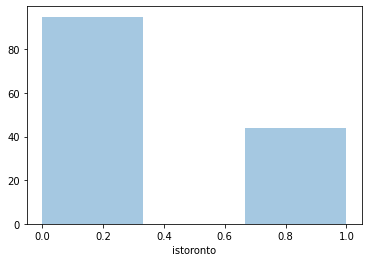

In [ ]:
# Read file
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/fuuy.csv", encoding='utf-8')
data = data.iloc[1: , :]
data  = data.dropna()


choropleth_quick_plot(geo_data, data, 'neighbourhood','name', 'istoronto', 'inferno_r')

# # Show the distribution of unemployment rate
# sns.distplot( data["istoronto"], hist=True, kde=False, rug=False );

# fullData = geoData.merge(data, left_on=['neighbourhood'], right_on=['name'])
# fullData.head(2)

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


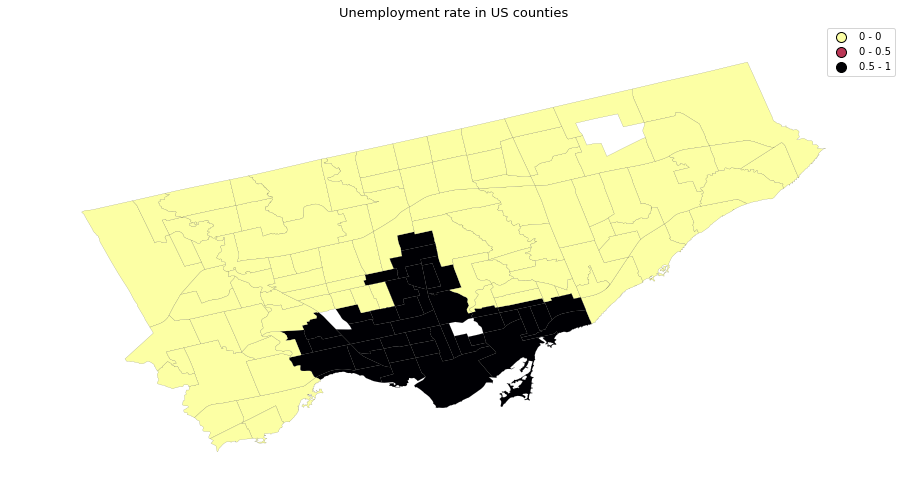

In [ ]:
# # Initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# # Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData['istoronto'], k=20)

# # Map
# gplt.choropleth(fullData,
#     hue="istoronto",
#     linewidth=.1,
#     scheme=scheme, cmap='inferno_r',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );

# ax.set_title('Unemployment rate in US counties', fontsize=13);

## Multi-Variable Classifiers

We will be using our demographic information to see if a classfier can correctly classify theneighbours into the city that were a part of until 1998.

We will be using Y and X as our classification methods.
For both methods, We will load the data, proccess it, split into train and test datasets, apply the apply the classification algorithm and finally calculate the accuracy of predictions.